In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

### 기본 Decision model

In [6]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
train_score = tree.score(x_train, y_train) #어떤 평가기준? accuracy // 회귀는 r2(결정계수)
test_score = tree.score(x_test, y_test)

In [9]:
print('train :', train_score) #훈련데이터 1 ==> 전부다 맞춤, 과대적합
print('test :', test_score)

train : 1.0
test : 0.9020979020979021


### 가지치기

In [28]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

In [30]:
print('train :', train_score) #과대적합 해소
print('test :', test_score)

train : 0.9765258215962441
test : 0.916083916083916


In [34]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt #트리모델 시각화
from matplotlib import rc
rc('font', family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

In [50]:
export_graphviz(tree, out_file='tree.dot',class_names=['악성','양성'], feature_names=cancer.feature_names, impurity=False, filled=True)

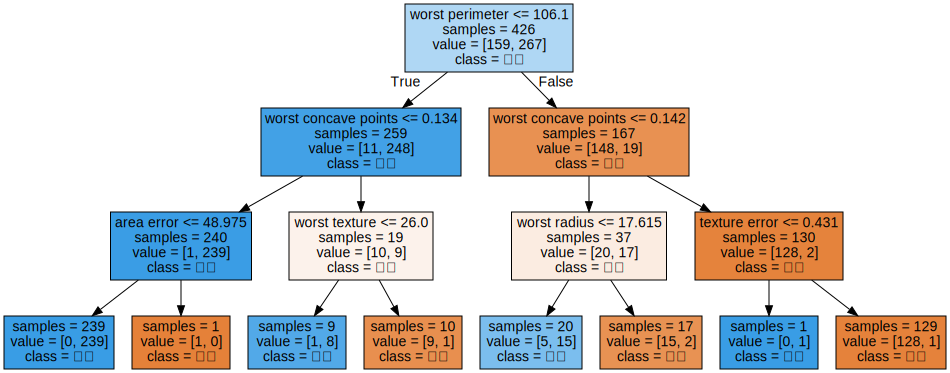

In [40]:
with open('tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [42]:
from sklearn.tree import plot_tree

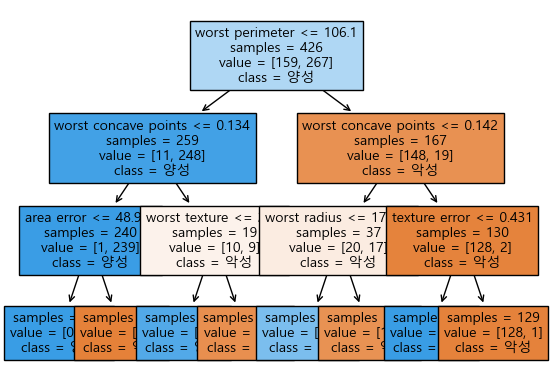

In [48]:
plot_tree(tree, class_names=['악성','양성'], feature_names=cancer.feature_names, impurity=False, filled=True, fontsize=10)
plt.show()

### 특성중요도
- 0~1 사이의 값 / 0 : 이 특성이 전혀 사용되지 않음, 1 : 이 특성이 완벽하게 정답값을 예측함
- 특성중요도의 전체 합 = 1 (확률)

In [51]:
print('특성 중요도 : \n', tree.feature_importances_) #\n:줄바꿈

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01069388
 0.         0.01090021 0.         0.         0.         0.
 0.         0.         0.04022023 0.03226776 0.79120523 0.
 0.         0.         0.         0.11471269 0.         0.        ]


(-1.0, 30.0)

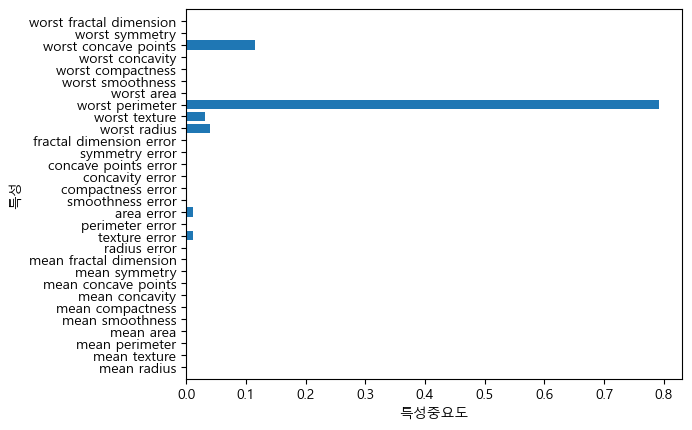

In [52]:
import numpy as np
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)

### Decision tree regressor

In [54]:
import os
import mglearn

In [55]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

In [59]:
del ram_prices['Unnamed: 0']
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


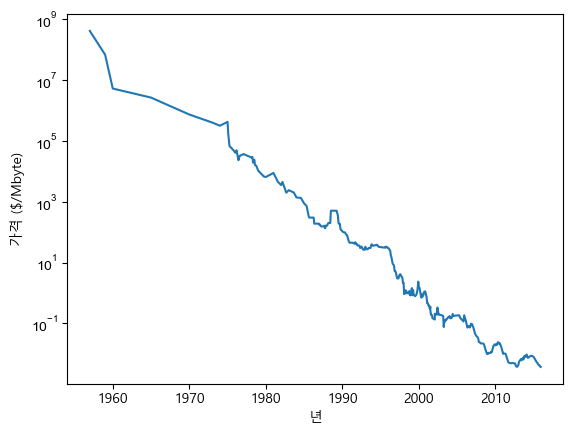

In [56]:
plt.yticks(fontname='Arial') #지수표현 하기위해 폰트설정
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')
plt.show()

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [60]:
#2000년 이전 데이터를 훈련데이터로, 2000년 이후 데이터를 테스트데이터로 사용
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [61]:
x_train = data_train.date.to_numpy()[:, np.newaxis] #날짜특성만 이용

In [66]:
y_train = np.log(data_train.price)

In [67]:
x_all = ram_prices.date.to_numpy()[:, np.newaxis]

In [68]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

In [69]:
pre_tree = tree.predict(x_all)
pre_lr = linear_reg.predict(x_all)

In [71]:
price_tree = np.exp(pre_tree) #지수함수 적용
price_lr = np.exp(pre_lr)

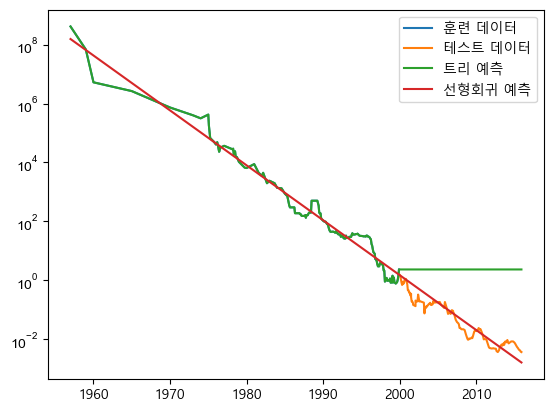

In [73]:
plt.yticks(fontname="Arial") #y축 지수표현해야해서 사용가능 폰트로 설정
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()
plt.show()